<a href="https://colab.research.google.com/github/gitdhirajsv/Consumer_Complaints_Analysis/blob/main/Consumer_Complaints_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [87]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [88]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [89]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [90]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [91]:
df = df.set_index(df["date_index"])

In [92]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [93]:
df["Date_month_year"].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

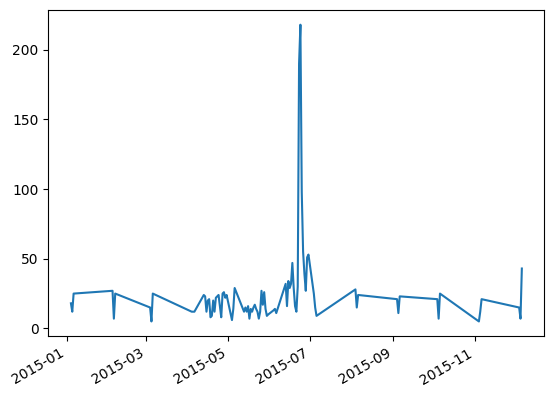

In [94]:
df["Date_month_year"].value_counts().plot();

In [95]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [96]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<Axes: xlabel='date_index'>

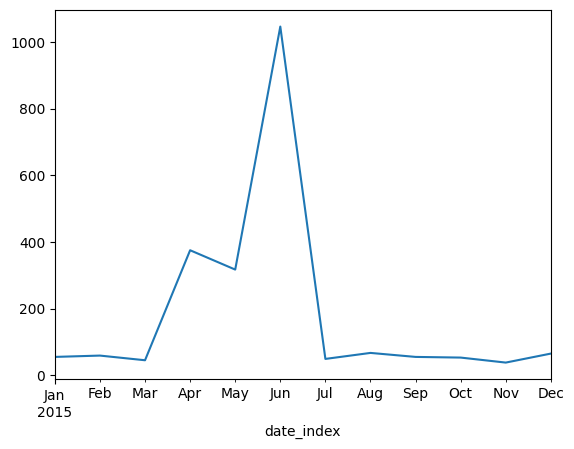

In [97]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [98]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [99]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [100]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [101]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [102]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<Axes: ylabel='State'>

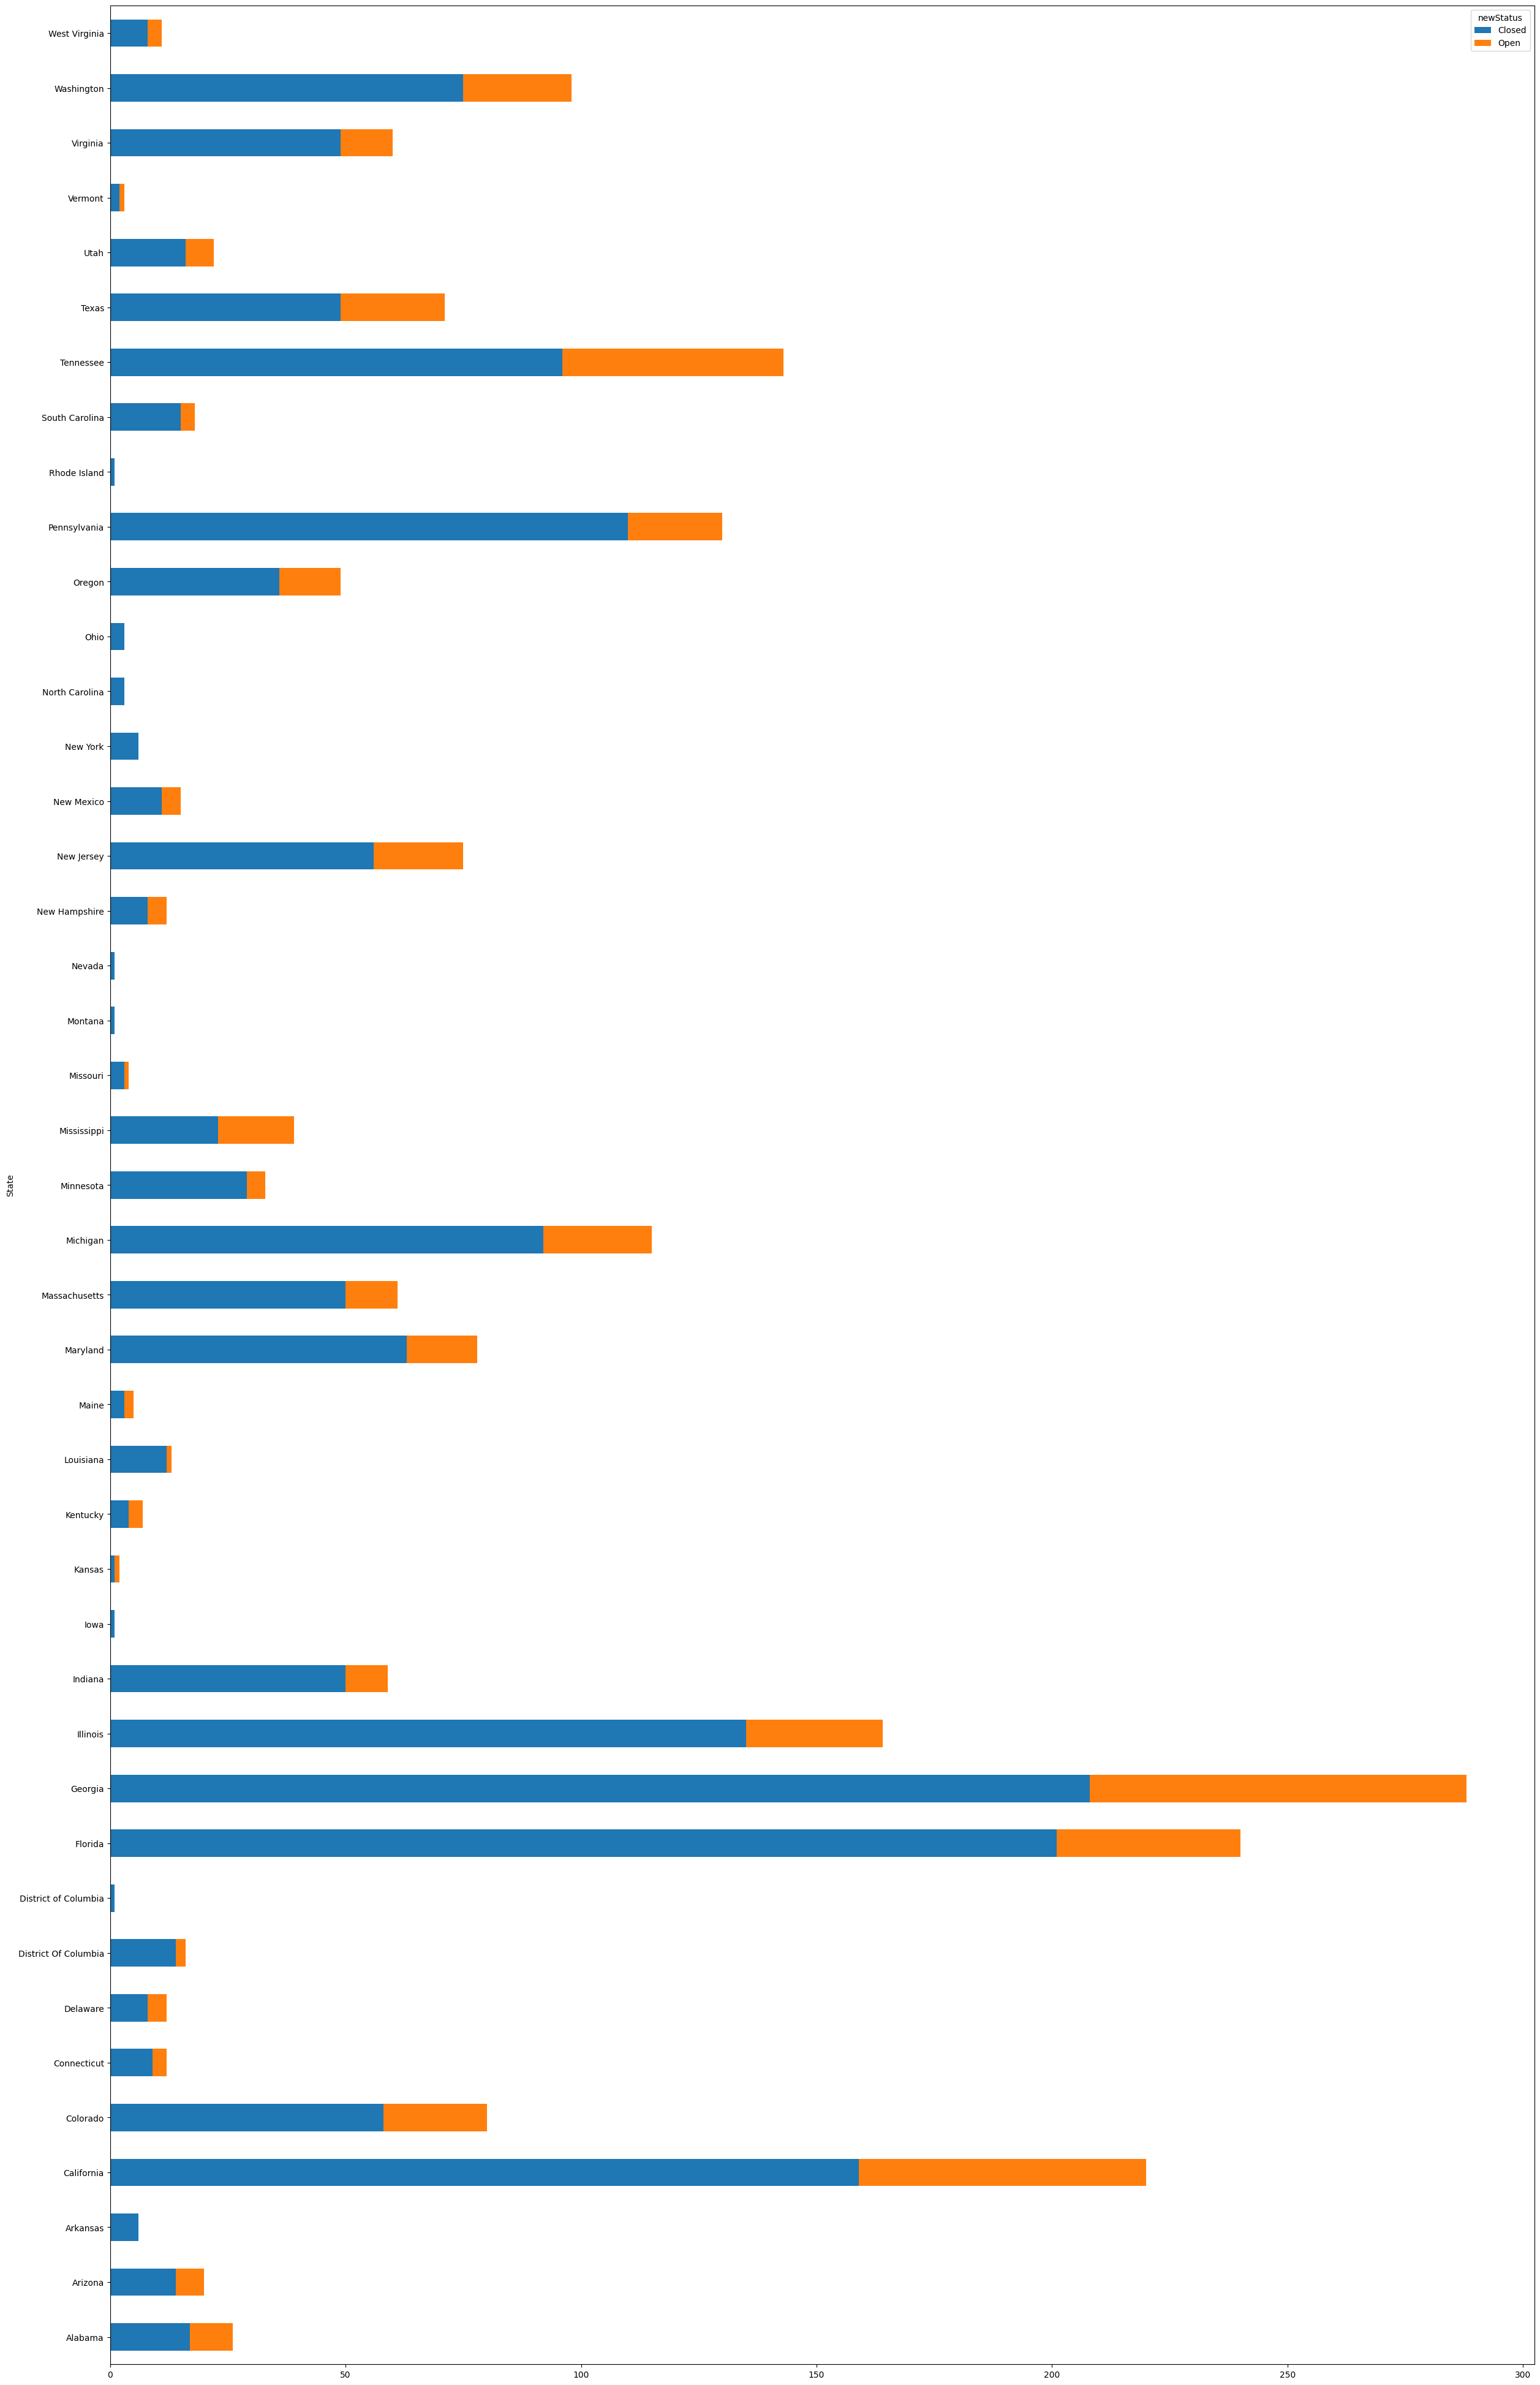

In [103]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [104]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [105]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [106]:
!pip install wordcloud

In [107]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [109]:
import nltk

nltk.download('wordnet')
from nltk.corpus import wordnet
definition = wordnet.synsets('dog')[0].definition()
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
import gensim
from gensim import corpora

In [111]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary<1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...>


In [112]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [113]:
from gensim.models import LdaModel

In [114]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [115]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.176*"data" + 0.142*"cap" + 0.132*"comcast" + 0.071*"internet" + 0.037*"slow" + 0.033*"usage" + 0.016*"outage" + 0.014*"limit" + 0.013*"cramming" + 0.012*"phone"')

(1, '0.113*"issue" + 0.108*"comcast" + 0.075*"service" + 0.056*"billing" + 0.022*"failure" + 0.021*"comcastxfinity" + 0.017*"without" + 0.014*"several" + 0.013*"provide" + 0.012*"shitty"')

(2, '0.123*"comcast" + 0.097*"charge" + 0.059*"xfinity" + 0.053*"cable" + 0.021*"overage" + 0.021*"promised" + 0.020*"account" + 0.019*"back" + 0.017*"incorrect" + 0.012*"unauthorized"')

(3, '0.049*"problem" + 0.036*"sale" + 0.026*"pay" + 0.026*"misleading" + 0.023*"bill" + 0.021*"lack" + 0.019*"service" + 0.016*"scam" + 0.016*"regarding" + 0.016*"monthly"')

(4, '0.053*"service" + 0.037*"false" + 0.029*"deceptive" + 0.026*"fee" + 0.025*"day" + 0.023*"monopoly" + 0.022*"switch" + 0.020*"contract" + 0.017*"advertising" + 0.017*"3"')

(5, '0.245*"service" + 0.174*"comcast" + 0.080*"complaint" + 0.051*"customer" + 0.036*"billing" + 0

In [116]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [117]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,data,issue,comcast,problem,service,service,comcast,internet,comcast
1,cap,comcast,charge,sale,false,comcast,billing,speed,service
2,comcast,service,xfinity,pay,deceptive,complaint,practice,comcast,bill
3,internet,billing,cable,misleading,fee,customer,unfair,throttling,poor
4,slow,failure,overage,bill,day,billing,pricing,connection,help
5,usage,comcastxfinity,promised,lack,monopoly,equipment,monopolistic,business,refund
6,outage,without,account,service,switch,terrible,fraudulent,access,without
7,limit,several,back,scam,contract,bad,show,connectivity,high
8,cramming,provide,incorrect,regarding,advertising,horrible,email,unreliable,price
9,phone,shitty,unauthorized,monthly,3,claim,xfinitycomcast,signal,2
